In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import json

In [6]:
with open('../application/artifacts/class_dictionary.json') as class_file:
    class_dict = json.load(class_file)
class_dict

{'Alan_Turing': 0, 'Albert_Einstein': 1, 'Isaac_Newton': 2, 'Marie_Curie': 3}

In [4]:
import os
img_dirs = []
for entry in os.scandir('../dataset/cropped'):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['../dataset/cropped\\Alan_Turing',
 '../dataset/cropped\\Albert_Einstein',
 '../dataset/cropped\\Isaac_Newton',
 '../dataset/cropped\\Marie_Curie']

In [88]:
SIZE = (64, 64)
X, y = [], []
for img_dir in img_dirs:
    scientist_name = img_dir.split('\\')[-1]
    for entry in os.scandir(img_dir):
        img = cv2.imread(entry.path)
        if img is None:
            continue
        resized_img = cv2.resize(img, SIZE)
        X.append(resized_img)
        y.append(class_dict[scientist_name])

print(len(X))
print(len(y))

119
119


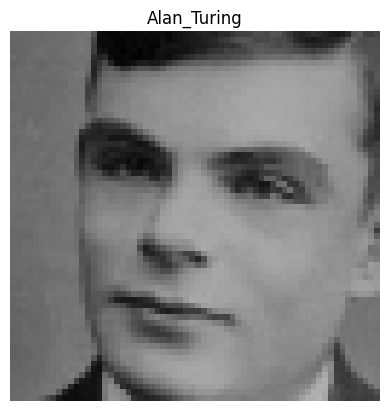

In [89]:
plt.imshow(X[0])
plt.title(list(class_dict.keys())[y[0]])
plt.axis('off')
plt.show()

### Split into Train/Test

In [90]:
X = np.array(X)
y = np.array(y)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(107, 64, 64, 3)
(107,)
(12, 64, 64, 3)
(12,)


In [93]:
# Reshape & Scale Input
X_train = X_train.astype(float).reshape(-1, 64, 64, 3) / 255.0
X_test = X_test.astype(float).reshape(-1, 64, 64, 3) / 255.0

### Build the Neural Network

In [94]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [95]:
INPUT_SHAPE = (64, 64, 3)
OUTPUT_CLASSES = 4

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (4,4), strides=(1,1), padding='Same', activation='relu', input_shape=(INPUT_SHAPE)))
    model.add(Conv2D(32, (2,2), strides=(1,1), padding='Same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(OUTPUT_CLASSES, activation='linear'))
    return model

In [96]:
model = build_model()

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               67109376  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 67247428 (256.53 MB)
Trainable params: 6

In [109]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Data Augmantation

In [110]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

### Training the model

In [111]:
EPOCHS = 60

history = model.fit(
    datagen.flow(X_train, y_train),
    epochs=EPOCHS
)

Epoch 1/60
4/4 [==============================] - 11s 2s/step - loss: 0.7280 - accuracy: 0.3084
Epoch 2/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 3/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 4/60
4/4 [==============================] - 8s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 5/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 6/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 7/60
4/4 [==============================] - 8s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 8/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 9/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 10/60
4/4 [==============================] - 7s 2s/step - loss: -8.5510 - accuracy: 0.3271
Epoch 11/60
4/4 [======================

### NN performance is too bad